# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Build query URL and request results in Fahrenheit
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = base_url + "appid=" + weather_api_key + "&units=imperial"+ "&q=" 


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(lats)

[-43.04250609 -87.05838709  44.65449993 ...  37.8442277  -10.16326869
  61.88445009]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#chequing that we produced at least 500 unique cities
len(cities)

623

In [5]:
# Loop through the list of cities and perform a request for data on each
name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
record_count = 0
set_count = 1

for city in cities:
    #keeping track of the set and record
    if record_count == 50:
        set_count +=1
        record_count = 0      
    
    try:
                   
        # assemble url and make API request
        response = requests.get(query_url + city).json()
        # extract and append results
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(city)
        record_count +=1
        
        #  print log of each city as it's being processed with the city number and city name 
        print(f"Processing Record {record_count} of set {set_count} | {city}")

    except KeyError:
        print(f"{city} not found. Skipping...")
    
       
     
       

Processing Record 1 of set 1 | mar del plata
Processing Record 2 of set 1 | port elizabeth
tasbuget not found. Skipping...
Processing Record 3 of set 1 | mataura
Processing Record 4 of set 1 | punta arenas
Processing Record 5 of set 1 | buarcos
Processing Record 6 of set 1 | kavieng
grand river south east not found. Skipping...
warqla not found. Skipping...
Processing Record 7 of set 1 | busselton
Processing Record 8 of set 1 | guerrero negro
Processing Record 9 of set 1 | bredasdorp
Processing Record 10 of set 1 | cockburn town
Processing Record 11 of set 1 | nikolskoye
Processing Record 12 of set 1 | santa cruz
Processing Record 13 of set 1 | leh
Processing Record 14 of set 1 | atuona
Processing Record 15 of set 1 | hermanus
Processing Record 16 of set 1 | avarua
Processing Record 17 of set 1 | hami
Processing Record 18 of set 1 | barrow
Processing Record 19 of set 1 | ushuaia
tsihombe not found. Skipping...
Processing Record 20 of set 1 | mahebourg
Processing Record 21 of set 1 | ti

Processing Record 41 of set 4 | enshi
Processing Record 42 of set 4 | roma
Processing Record 43 of set 4 | jeremoabo
Processing Record 44 of set 4 | florianopolis
Processing Record 45 of set 4 | nyurba
Processing Record 46 of set 4 | berezovyy
Processing Record 47 of set 4 | bethel
Processing Record 48 of set 4 | koumac
Processing Record 49 of set 4 | cap malheureux
Processing Record 50 of set 4 | bilibino
Processing Record 1 of set 5 | broome
Processing Record 2 of set 5 | katherine
Processing Record 3 of set 5 | khatanga
Processing Record 4 of set 5 | vardo
Processing Record 5 of set 5 | luwuk
mys shmidta not found. Skipping...
Processing Record 6 of set 5 | aasiaat
Processing Record 7 of set 5 | san cristobal
Processing Record 8 of set 5 | victoria
Processing Record 9 of set 5 | pasighat
Processing Record 10 of set 5 | ponta do sol
Processing Record 11 of set 5 | nador
Processing Record 12 of set 5 | kalabo
Processing Record 13 of set 5 | hotton
Processing Record 14 of set 5 | faanu

Processing Record 29 of set 8 | poitiers
Processing Record 30 of set 8 | dunedin
Processing Record 31 of set 8 | mnogovershinnyy
phan rang not found. Skipping...
Processing Record 32 of set 8 | constitucion
Processing Record 33 of set 8 | ancud
Processing Record 34 of set 8 | waddan
Processing Record 35 of set 8 | cabedelo
Processing Record 36 of set 8 | utraula
Processing Record 37 of set 8 | hanzhong
Processing Record 38 of set 8 | bubaque
Processing Record 39 of set 8 | kayerkan
Processing Record 40 of set 8 | bandraboua
Processing Record 41 of set 8 | tateyama
yurya not found. Skipping...
Processing Record 42 of set 8 | bambanglipuro
Processing Record 43 of set 8 | grand-santi
Processing Record 44 of set 8 | hirara
Processing Record 45 of set 8 | garsten
Processing Record 46 of set 8 | srednekolymsk
Processing Record 47 of set 8 | pochutla
sahrak not found. Skipping...
Processing Record 48 of set 8 | dafeng
Processing Record 49 of set 8 | tucuman
Processing Record 50 of set 8 | cha

Processing Record 14 of set 12 | aksu
Processing Record 15 of set 12 | coahuayana
Processing Record 16 of set 12 | san andres
metehara not found. Skipping...
Processing Record 17 of set 12 | lensk
Processing Record 18 of set 12 | ballina
Processing Record 19 of set 12 | mandalgovi


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame from cities, lat, and temp
city_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    }
city_data = pd.DataFrame(city_dict)
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        569 non-null    object 
 1   Lat         569 non-null    float64
 2   Lng         569 non-null    float64
 3   Max Temp    569 non-null    float64
 4   Humidity    569 non-null    int64  
 5   Cloudiness  569 non-null    int64  
 6   Wind Speed  569 non-null    float64
 7   Country     569 non-null    object 
 8   Date        569 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.1+ KB


In [7]:
for key, value in city_dict.items():
    print(f"{key} : {len(value)}")

City : 569
Lat : 569
Lng : 569
Max Temp : 569
Humidity : 569
Cloudiness : 569
Wind Speed : 569
Country : 569
Date : 569


In [8]:
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,48.99,87,90,5.82,AR,1593729265
1,port elizabeth,-33.92,25.57,60.80,72,20,17.22,ZA,1593729496
2,mataura,-46.19,168.86,39.00,83,27,3.00,NZ,1593729496
3,punta arenas,-53.15,-70.92,33.80,93,90,5.82,CL,1593729496
4,buarcos,40.17,-8.88,61.00,77,0,10.29,PT,1593729496


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data_humidity = city_data.loc[city_data['Humidity'] > 100]
city_data_humidity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        0 non-null      object 
 1   Lat         0 non-null      float64
 2   Lng         0 non-null      float64
 3   Max Temp    0 non-null      float64
 4   Humidity    0 non-null      int64  
 5   Cloudiness  0 non-null      int64  
 6   Wind Speed  0 non-null      float64
 7   Country     0 non-null      object 
 8   Date        0 non-null      int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 0.0+ bytes


In [10]:
#Performing stats on the database
categories = ['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']
stats = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']

def city_stats(categories):
    
    for category in categories:

        count = city_data[category].count()
        mean = city_data[category].mean()
        std = city_data[category].std()
        mini = city_data[category].min()
        quartiles = city_data[category].quantile([.25,.5,.75])
        lowerq = quartiles[0.25]
        middleq = quartiles[0.50]
        upperq = quartiles[0.75]
        maxi = city_data[category].max()
        
        print([count,mean,std,mini, lowerq, middleq, upperq, maxi])
    

In [11]:
city_stats(categories)

[569, 18.67778558875219, 33.182941215229604, -54.8, -10.27, 22.29, 46.13, 78.22]
[569, 20.52246045694202, 91.4771908667132, -175.2, -59.53, 21.45, 104.08, 179.32]
[569, 68.41952548330404, 14.524551978004743, 28.4, 57.2, 70.36, 79.39, 104.0]
[569, 69.6432337434095, 20.473384321621847, 3, 59.0, 74.0, 84.0, 100]
[569, 48.6871704745167, 36.490745410397544, 0, 12.0, 49.0, 80.0, 100]
[569, 7.805500878734622, 5.19749978528571, 0.2, 3.76, 6.93, 10.29, 28.74]
[569, 1593729499.4147627, 63.69284397188644, 1593728756, 1593729505.0, 1593729515.0, 1593729524.0, 1593729533]


In [12]:
categories2 = ['', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']
city_stats_df = pd.DataFrame(list(zip(stats,[583, 20.473979416809616, 32.910371864098586, -54.8, -6.8, 26.18, 47.735, 78.22],
[583, 19.66173241852487, 89.69635138512919, -175.2, -54.88, 23.27, 100.625, 179.32],
[583, 69.05154373927951, 14.090532929287342, 26.6, 60.01, 70.38, 79.045, 106.32],
[583, 69.56775300171526, 21.903924617995884, 3, 58.0, 75.0, 87.0, 100],
[583, 46.7409948542024, 36.7403326748231, 0, 8.0, 40.0, 82.0, 100],
[583, 7.517993138936533, 5.070556296363547, 0.29, 3.65, 6.35, 10.29, 39.15],
[583, 1592891866.1818182, 58.22126781719771, 1592891392, 1592891867.0, 1592891881.0, 1592891892.0, 1592891909])),columns=categories2)

In [13]:
city_data_df = city_stats_df.set_index([''])

In [14]:
city_data_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
,,,,,,,
Count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02
Mean,20.473979,19.661732,69.051544,69.567753,46.740995,7.517993,1.592892e+09
Std,32.910372,89.696351,14.090533,21.903925,36.740333,5.070556,5.822127e+01
Min,-54.800000,-175.200000,26.600000,3.000000,0.000000,0.290000,1.592891e+09
25%,-6.800000,-54.880000,60.010000,58.000000,8.000000,3.650000,1.592892e+09
50%,26.180000,23.270000,70.380000,75.000000,40.000000,6.350000,1.592892e+09
75%,47.735000,100.625000,79.045000,87.000000,82.000000,10.290000,1.592892e+09
Max,78.220000,179.320000,106.320000,100.000000,100.000000,39.150000,1.592892e+09


In [15]:
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,18.677786,20.522460,68.419525,69.643234,48.687170,7.805501,1.593729e+09
std,33.182941,91.477191,14.524552,20.473384,36.490745,5.197500,6.369284e+01
min,-54.800000,-175.200000,28.400000,3.000000,0.000000,0.200000,1.593729e+09
25%,-10.270000,-59.530000,57.200000,59.000000,12.000000,3.760000,1.593730e+09
50%,22.290000,21.450000,70.360000,74.000000,49.000000,6.930000,1.593730e+09
75%,46.130000,104.080000,79.390000,84.000000,80.000000,10.290000,1.593730e+09
max,78.220000,179.320000,104.000000,100.000000,100.000000,28.740000,1.593730e+09


In [16]:
# .loc conditionals to remove values. 
clean_city_data = city_data.loc[city_data['Humidity'] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,48.99,87,90,5.82,AR,1593729265
1,port elizabeth,-33.92,25.57,60.80,72,20,17.22,ZA,1593729496
2,mataura,-46.19,168.86,39.00,83,27,3.00,NZ,1593729496
3,punta arenas,-53.15,-70.92,33.80,93,90,5.82,CL,1593729496
4,buarcos,40.17,-8.88,61.00,77,0,10.29,PT,1593729496
...,...,...,...,...,...,...,...,...,...
564,coahuayana,18.73,-103.68,82.40,69,75,5.48,MX,1593729532
565,san andres,12.58,-81.70,84.20,79,90,11.41,CO,1593729532
566,lensk,60.73,114.93,66.90,52,89,4.21,RU,1593729532
567,ballina,-28.87,153.57,63.00,100,0,6.06,AU,1593729533


In [17]:
#clean_city_data = weather_df.drop(highhumid, inplace=False)

In [18]:
#  Get the indices of cities that have humidity over 100%.
#getting the row number...  ".index"

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [20]:
# Extract relevant fields from the data frame
City_Data_Final=clean_city_data
# Export the City_Data into a csv
City_Data_Final.to_csv('../output_data/City_Data_Final.csv', index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [21]:
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,48.99,87,90,5.82,AR,1593729265
1,port elizabeth,-33.92,25.57,60.80,72,20,17.22,ZA,1593729496
2,mataura,-46.19,168.86,39.00,83,27,3.00,NZ,1593729496
3,punta arenas,-53.15,-70.92,33.80,93,90,5.82,CL,1593729496
4,buarcos,40.17,-8.88,61.00,77,0,10.29,PT,1593729496
...,...,...,...,...,...,...,...,...,...
564,coahuayana,18.73,-103.68,82.40,69,75,5.48,MX,1593729532
565,san andres,12.58,-81.70,84.20,79,90,11.41,CO,1593729532
566,lensk,60.73,114.93,66.90,52,89,4.21,RU,1593729532
567,ballina,-28.87,153.57,63.00,100,0,6.06,AU,1593729533


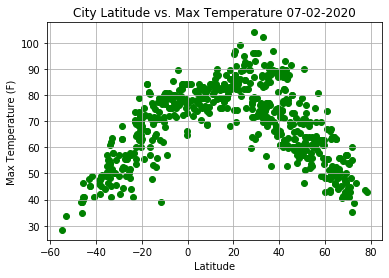

In [22]:
# Generate a scatter plot of city Latitude vs. Max Temperature
xaxis1 = clean_city_data['Lat']
yaxis1 = clean_city_data['Max Temp']
datemax= clean_city_data['Date'].max()
dateon= datetime.utcfromtimestamp(datemax).strftime('%m-%d-%Y')

plt.scatter(xaxis1, yaxis1, marker="o", color="green")
plt.title(f"City Latitude vs. Max Temperature {dateon}")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)


plt.savefig(f'../output_data/Fig1. Max Temperature vs. Latitude {dateon}.png')
plt.show()

This plot is showing the relationship between city latitude and maximum temperature in Faherheit for all the cities presented in our dataframe. As we approach the equator (Latitude = o) there is a tendency of increasing temperature and as we pass the equator and get further away from it the max temperature decreases as well. 

## Latitude vs. Humidity Plot

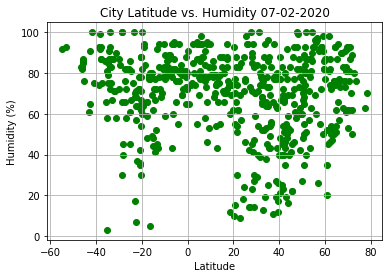

In [23]:
# Generate a scatter plot of city Latitude vs. Max Temperature
xaxis2 = clean_city_data['Lat']
yaxis2 = clean_city_data['Humidity']
datemax= clean_city_data['Date'].max()
dateon= datetime.utcfromtimestamp(datemax).strftime('%m-%d-%Y')

plt.scatter(xaxis2, yaxis2, marker="o", color="green")
plt.title(f'City Latitude vs. Humidity {dateon}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
# plt.ylim(33,48)
# plt.xlim(14,26)
plt.grid(True)

plt.savefig(f'../output_data/Fig2. Latitude vs. Humidity Linear Regression on {dateon}.png')
plt.show()

This plot is showing the relationship between city latitude and humidity for all the cities presented in our dataframe at the time of the extraction. We can observe that latitude change doesn't impact the level of humidity of the city in an obvious way, nevertheless we see less cities with lower humidity levels in the equator line. 

## Latitude vs. Cloudiness Plot

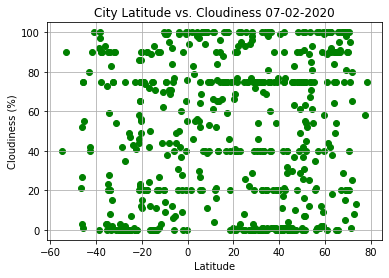

In [24]:
# Generate a scatter plot of city Latitude vs. Cloudiness Plot
xaxis3 = clean_city_data['Lat']
yaxis3 = clean_city_data['Cloudiness']
datemax= clean_city_data['Date'].max()
dateon= datetime.utcfromtimestamp(datemax).strftime('%m-%d-%Y')

plt.scatter(xaxis3, yaxis3, marker="o", color="green")
plt.title(f'City Latitude vs. Cloudiness {dateon}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
# plt.ylim(33,48)
# plt.xlim(14,26)
plt.grid(True)

plt.savefig(f'../output_data/Fig3. Latitude vs. Cloudiness Linear Regression on {dateon}.png')
plt.show()

This plot is showing the relationship between city latitude and cloudiness for all the cities presented in our dataframe at the time of the extraction. We can observe that latitude change doesn't have an impact on cloudiness as there are multiple values of cloudiness scattered randomly accross all latitudes. 

## Latitude vs. Wind Speed Plot

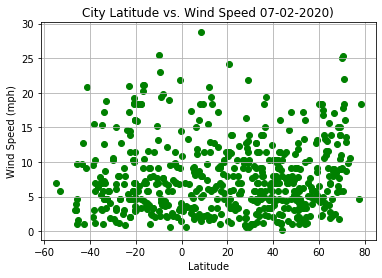

In [25]:
# Generate a scatter plot of city Latitude vs. Speed Plot
xaxis4 = clean_city_data['Lat']
yaxis4 = clean_city_data['Wind Speed']
datemax= clean_city_data['Date'].max()
dateon= datetime.utcfromtimestamp(datemax).strftime('%m-%d-%Y')

plt.scatter(xaxis4, yaxis4, marker="o", color="green")
plt.title(f'City Latitude vs. Wind Speed {dateon})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)

plt.savefig(f'../output_data/Fig4. Latitude vs. Wind Speed Linear Regression on {dateon}.png')
plt.show()

This plot is showing the relationship between city latitude and wind speed (mph) for all the cities presented in our dataframe at the time of the extraction. Similarly to cloudiness, we can observe that latitude change doesn't have an impact on wind speed.

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x, y, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Plot
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5397185898269264


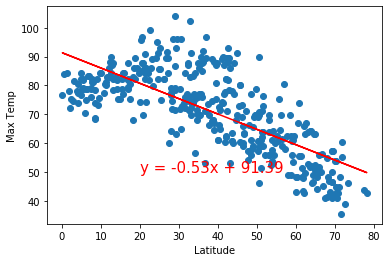

<Figure size 432x288 with 0 Axes>

In [28]:
#Plotting the Northern Hemisphere - Max Temp vs. Latitude Linear Regression with a function
xaxis1 = northern_hemisphere["Lat"]
yaxis1 = northern_hemisphere["Max Temp"]
plot_linear_regression(xaxis1, yaxis1, "Max Temp", (20,50)) 

plt.savefig(f'../output_data/Max Temp vs Latitud (Northern Hemisphere).png')
plt.show()

The r-squared is: 0.5397185898269264


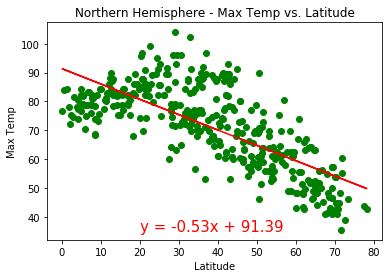

In [29]:
#Calculating linear regression and plotting it in the scatter chart for comparison
xaxis5 = northern_hemisphere['Lat']
yaxis5 = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis5, yaxis5)
regress_values = xaxis5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis5, yaxis5, marker='o', color = 'green')
plt.plot(xaxis5,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(f'../output_data/Fig5. Max Temp vs Latitud (Northern Hemisphere)2.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6983047532171336


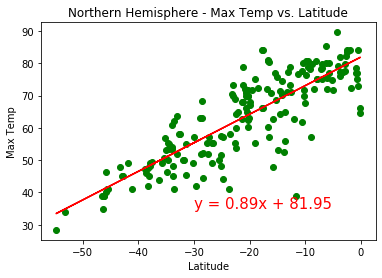

In [30]:
#Plotting the Southern Hemisphere - Max Temp vs. Latitude Linear Regression with a function
xaxis6 = southern_hemisphere['Lat']
yaxis6 = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis6, yaxis6)
regress_values = xaxis6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis6, yaxis6, marker='o', color = 'green')
plt.plot(xaxis6,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")


#Save figure to output
plt.savefig(f'../output_data/Fig6. Max Temp vs Latitud (Southern Hemisphere).png')
plt.show()

Max Temp vs. Latitude Linear Regression: There is is a weak negative correlation with regards to the latitud for the Max temperature in the northern hemisphere as we get further away from the equator, on the other hand there is a weak positive correlation with regards to latitud for the max temperature when we are approaching the equator. This was observed clearly in the first set of plots and this is a confirmation that max temperature is correlated to latitude and the temperature tends to increase as we approach the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0003989208119713028


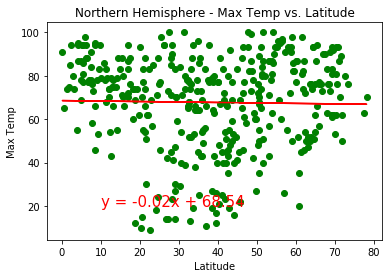

In [31]:
#Plotting the Northern Hemisphere - Humidity vs. Latitude Linear Regression with a function
xaxis7 = northern_hemisphere['Lat']
yaxis7 = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis7, yaxis7)
regress_values = xaxis7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis7, yaxis7, marker='o', color = 'green')
plt.plot(xaxis7,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")


plt.savefig(f'../output_data/Fig7. Humidity vs Latitud (Northern Hemisphere).png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006899645103280075


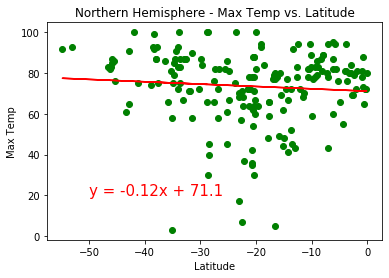

In [32]:
#Plotting the Southern Hemisphere - Humidity vs. Latitude Linear Regression with a function
xaxis8 = southern_hemisphere['Lat']
yaxis8 = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis8, yaxis8)
regress_values = xaxis8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis8, yaxis8, marker='o', color = 'green')
plt.plot(xaxis8,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(f'../output_data/Fig8. Humidity vs. Latitud (Southern Hemisphere).png')
plt.show()

The correlation is almost inexistent for humidity and maximum temperature in both the northern and southern hemispheres. With a minimal negative correlation as we get further away from the equator in the northern hemisphere and a minimal positive correlation as we get closer to the equator in the southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0021783474528921055


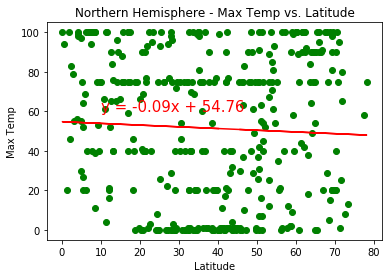

In [33]:
#Plotting the Northern Hemisphere - Cloudiness vs. Latitude Linear Regression with a function
xaxis9 = northern_hemisphere['Lat']
yaxis9 = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis9, yaxis9)
regress_values = xaxis9 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis9, yaxis9, marker='o', color = 'green')
plt.plot(xaxis9,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(f'../output_data/Fig9. Cloudiness vs. Latitud (Northern Hemisphere).png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.001174125997843802


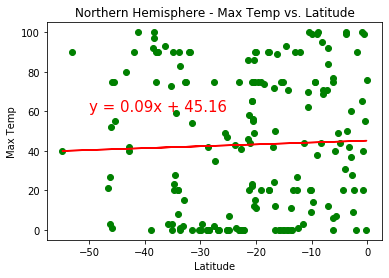

In [34]:
#Plotting the Southern Hemisphere - Cloudiness vs. Latitude Linear Regression with a function
xaxis10 = southern_hemisphere['Lat']
yaxis10 = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis10, yaxis10)
regress_values = xaxis10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis10, yaxis10, marker='o', color = 'green')
plt.plot(xaxis10,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(f'../output_data/Fig10. Cloudiness vs. Latitud (Southern Hemisphere).png')
plt.show()

Similarly, the correlation is almost inexistent for cloudiness and maximum temperature in both the northern and southern hemispheres. With a minimal positive correlation as we get further away from the equator in the northern hemisphere and a minimal negative correlation as we get closer to the equator in the southern hemisphere. In general it can be concluded that latitude is not correlated to cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.010374849897017091


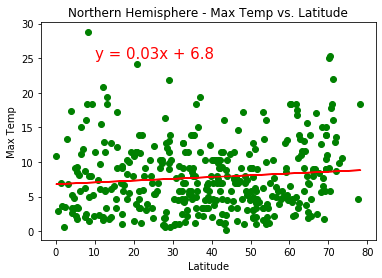

In [35]:
#Plotting the Northern Hemisphere - Wind Speed vs. Latitude Linear Regression with a function
xaxis11 = northern_hemisphere['Lat']
yaxis11 = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis11, yaxis11)
regress_values = xaxis11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis11, yaxis11, marker='o', color = 'green')
plt.plot(xaxis11,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(f'../output_data/Fig11. Wind Speed(mph) vs. Latitud (Northern Hemisphere).png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006788822608927304


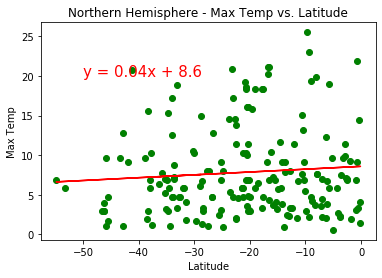

In [36]:
#Plotting the Southern Hemisphere - Wind Speed vs. Latitude Linear Regression with a function
xaxis12 = southern_hemisphere['Lat']
yaxis12 = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis12, yaxis12)
regress_values = xaxis12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xaxis12, yaxis12, marker='o', color = 'green')
plt.plot(xaxis12,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

plt.savefig(f'../output_data/Fig12. Wind Speed(mph) vs. Latitud (Southern Hemisphere).png')
plt.show()

Again, we observe no correlation between wind speed and latitude in both the northern and southern hemisphere.